# Cadenas de Markov

¿Qué es un proceso estocástico?

Ante la interrogante *“What is a stochastic process?* El estádisitco R.A. Fisher respondio: *"Oh, it’s just one darn thing after another.”*


Un **proceso estocástico** es una colección de variables aleatorias ${X_n}$, definidas sobre un espacio de probabilidad común, que describen como evoluciona un sistema.


En el contexto de los procesos estocásticos, cada valor que puede tomar una variable aleatoria se le denomina estado. El conjunto de estados puede ser discreto o continuo.

Las cadenas de Markov deben su nombre al profesor Andrei A. Markov (1856-1922). En general, para un proceso a tiempo discreto, la variable aleatoria Xn depende de valores anteriores del proceso $X_{n−1}, X_{n−2}, . . .$ Por lo tanto estamos interesados en
distribuciones condicionales del tipo $P(X_n|X_1, . . . , X_{n−1})$.
Nosotros estudiaremos los procesos estocásticos que cumplen la propiedad de
Markov:

$$P(X_n|X_1, . . . , X_{n−1}) = P(X_n|X_{n−1})$$.
 La propiedad de Markov es nombrada a veces como la propiedad de “falta de memoria”. “Dado
el presente (X_n), el futuro (X_{n+1}) es independiente del pasado (X_1, . . . , X_{n−1})”.

La probabilidad $p_{ij}$ representa la probabilidad de que el proceso haga una transición
desde el estado i al estado j. Por tanto, $p_{ij} ≥ 0$ y para $i$ fijo $∑_{jϵE}p_{ij}=1$ .


La matriz formada por las probabilidades de transición $pij$ se le llama matriz de transición.


##Aplicaciones:

Modelado de usuarios en sistemas de recomendación.

Análisis de lenguaje natural (Modelos de lenguaje de primer orden).

Predicción de secuencias (por ejemplo, ADN, series financieras).

Procesos estocásticos en robótica.

## Ejemplo 1

Suponga que en la unidad de cuidados intensivos (UCI) de un hospital, cada paciente es catalogado según su estado de salud en alguno de los tres niveles: estable (E), delicado (D), muy grave (MG). Estos niveles son revisados y actualizados por el personal médico cada día. Suponga además que las probabilidades que indican si paciente pase de un nivel (estado) a otro son los señalados en la siguiente tabla:

| De $\rightarrow$ A | E    | D    | MG    |
|--------|------|------|------|
| **D**  | 0.52 | 0.3 | 0.18 |
| **E**  | 0.23  | 0.35  | 0.42  |
| **MG**  | 0.07  | 0.24  | 0.69  |

1. Determinar la probabilidad que un paciente que se reporta en estado muy grave el día Lunes esté estable al Miércoles siguiente.

2. Calcular el valor de la probabilidad para que una persona que está en estado delicado el Domingo no continúe en ese estado el siguiente Miércoles.


In [414]:
import numpy as np
matriz_transicion=np.array([[0.52, 0.3, 0.18],
                            [0.23, 0.35, 0.42],
                            [0.07, 0.24, 0.69]])

In [415]:
# para 1
estado_Lunes=np.array([0, 0, 1])

# para martes
estado_Martes = np.dot(estado_Lunes,matriz_transicion )
estado_Miercoles = np.dot(estado_Martes,matriz_transicion )
estado_Miercoles


array([0.1399, 0.2706, 0.5895])

In [417]:
print("La probabilidad de que el estado del paciente sea Estable es ", estado_Miercoles[0])

La probabilidad de que el estado del paciente sea Estable es  0.1399


Se puede implementar una función para conocer el estado en k días.

In [1]:
def paciente(current_state,k):
    for i in range(k):
        current_state = np.dot(current_state, matriz_transicion)
    return current_state

In [419]:
current_state=np.array([0, 0, 1])
paciente(current_state,2)

array([0.1399, 0.2706, 0.5895])

Otra forma, consiste en elevar la matriz de transición a la k-esima potencia.

In [420]:
current_state=np.array([0, 0, 1])
k=2
c=np.dot(current_state, np.linalg.matrix_power(matriz_transicion,k))
c

array([0.1399, 0.2706, 0.5895])

Para 2

In [421]:
current_state=np.array([0, 1, 0])
prob_=paciente(current_state,3) # de domingo a miercoles

print("La probabilidad de que el estado del paciente no sea Delicado es  ", prob_[0]+prob_[2])

La probabilidad de que el estado del paciente no sea Delicado es   0.714077


## Ejemplo 2

El pronóstico meteorológico es un desafío constante debido a la complejidad y variabilidad del clima. Para este ejercicio, vamos a simplificar el problema utilizando una cadena de Markov para modelar los cambios en el estado del clima de una localidad que experimenta tres tipos de clima: Soleado, Nublado y Lluvioso.

### Objetivo
Tu tarea será simular el estado del clima durante 10 días consecutivos, empezando con un día soleado, utilizando una cadena de Markov para predecir los cambios diarios basados en un conjunto dado de probabilidades de transición.

### Estados y Matriz de Transición

En nuestro modelo de pronóstico del clima, consideramos tres estados posibles: Soleado (S), Nublado (N) y Lluvioso (L).

### Estados
- **S**: Soleado
- **N**: Nublado
- **L**: Lluvioso

### Matriz de Transición
La matriz de transición es:

| De $\rightarrow$ A | S    | N    | L    |
|--------|------|------|------|
| **S**  | 0.8  | 0.15 | 0.05 |
| **N**  | 0.2  | 0.6  | 0.2  |
| **L**  | 0.1  | 0.3  | 0.6  |


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def clima(state,days):
    # Definimos la matriz de transición
    P = np.array([
                 [0.8, 0.15, 0.05],  # De Soleado
                 [0.2, 0.6, 0.2],    # De Nublado
                 [0.1, 0.3, 0.6]     # De Lluvioso
                 ])

    # Evolución durante days
    states = [state]
    for _ in range(days):
        state = np.dot(state, P)
        states.append(state)

    return np.array(states)

In [3]:
estados=clima(np.array([0,0,1]),10)
estados

array([[0.        , 0.        , 1.        ],
       [0.1       , 0.3       , 0.6       ],
       [0.2       , 0.375     , 0.425     ],
       [0.2775    , 0.3825    , 0.34      ],
       [0.3325    , 0.373125  , 0.294375  ],
       [0.3700625 , 0.3620625 , 0.267875  ],
       [0.39525   , 0.35310938, 0.25164063],
       [0.41198594, 0.34664531, 0.24136875],
       [0.42305469, 0.3421957 , 0.23474961],
       [0.43035785, 0.33920051, 0.23044164],
       [0.43517055, 0.33720647, 0.22762298]])

In [4]:
# Para definir el clima para cada día se puede usar argmax()

weather_states = ['Soleado', 'Nublado', 'Lluvioso']
for estado in estados:
    print(weather_states[estado.argmax()])

Lluvioso
Lluvioso
Lluvioso
Nublado
Nublado
Soleado
Soleado
Soleado
Soleado
Soleado
Soleado


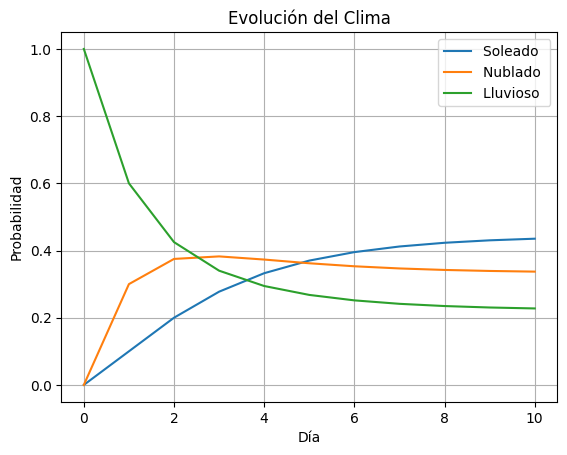

In [442]:
# Graficamos la probabilidad de los estados
plt.plot(estados[:,0], label='Soleado ')
plt.plot(estados[:,1], label='Nublado ')
plt.plot(estados[:,2], label='Lluvioso ')
plt.xlabel('Día')
plt.ylabel('Probabilidad')
plt.title('Evolución del Clima')
plt.legend()
plt.grid(True)
plt.show()

## Estado Estacionario

En una cadena de Markov, el estado estacionario es una distribución de probabilidades que no cambia con el tiempo, incluso después de aplicar muchas veces la matriz de transición.

En otras palabras, Es un vector de probabilidades que se mantiene constante al aplicar la matriz de transición; es decir:

$$X_{n+1}=X_{n}P$$
donde:
$$X_{n+1}=X_{n}$$

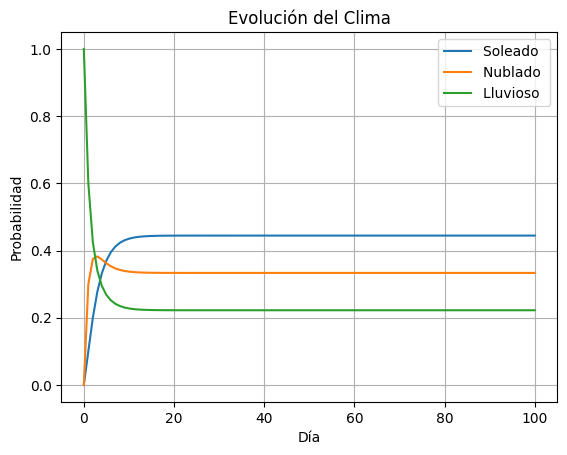

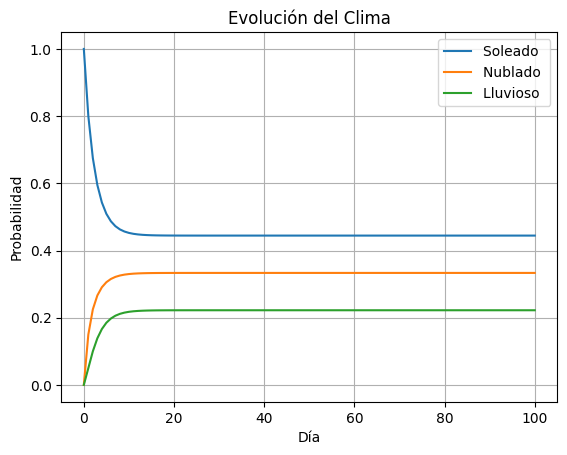

In [446]:
# sin importar el estado inicial siempre converge a las mismas probabilidades
estados=clima(np.array([0,0,1]),100)

plt.plot(estados[:,0], label='Soleado ')
plt.plot(estados[:,1], label='Nublado ')
plt.plot(estados[:,2], label='Lluvioso ')
plt.xlabel('Día')
plt.ylabel('Probabilidad')
plt.title('Evolución del Clima')
plt.legend()
plt.grid(True)
plt.show()


estados=clima(np.array([1,0,0]),100)

plt.plot(estados[:,0], label='Soleado ')
plt.plot(estados[:,1], label='Nublado ')
plt.plot(estados[:,2], label='Lluvioso ')
plt.xlabel('Día')
plt.ylabel('Probabilidad')
plt.title('Evolución del Clima')
plt.legend()
plt.grid(True)
plt.show()